In [24]:
import numpy as np
import pandas as pd
df=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv")
# df = df.rename(columns={"tails_heads": "tails→heads"})
# df = df.rename(columns={"heads_heads": "heads→heads"})

In [25]:
df["tails→tails"]=df["N_start_tails_up"]-df["tails→heads"]
df['heads_ratio'] = df['heads→heads'] / df['N_start_heads_up']
df['tails_ratio'] = df['tails→tails'] / df['N_start_tails_up']
df = df[['heads→heads', 'tails→tails', 'N_start_heads_up', 'N_start_tails_up',"heads_ratio","tails_ratio","person","coin"]]
df

,heads→heads,tails→tails,N_start_heads_up,N_start_tails_up,heads_ratio,tails_ratio,person,coin
0,244,275,485,515,0.503093,0.533981,frantisekB,20DEM-silver
1,260,250,505,495,0.514851,0.505051,frantisekB,1CZK
2,209,271,469,531,0.445629,0.510358,frantisekB,5CZK
3,530,484,1021,979,0.519099,0.494382,frantisekB,0.25USD
4,533,454,1039,961,0.512993,0.472425,frantisekB,10CZK
...,...,...,...,...,...,...,...,...
206,517,555,1084,1116,0.476937,0.497312,FrederikAust,0.50EUR
207,782,830,1626,1674,0.480935,0.495818,FrederikAust,2EUR
208,233,273,478,522,0.487448,0.522989,FrederikAust,1EUR
209,775,731,1523,1477,0.508864,0.494922,FrederikAust,0.20EUR


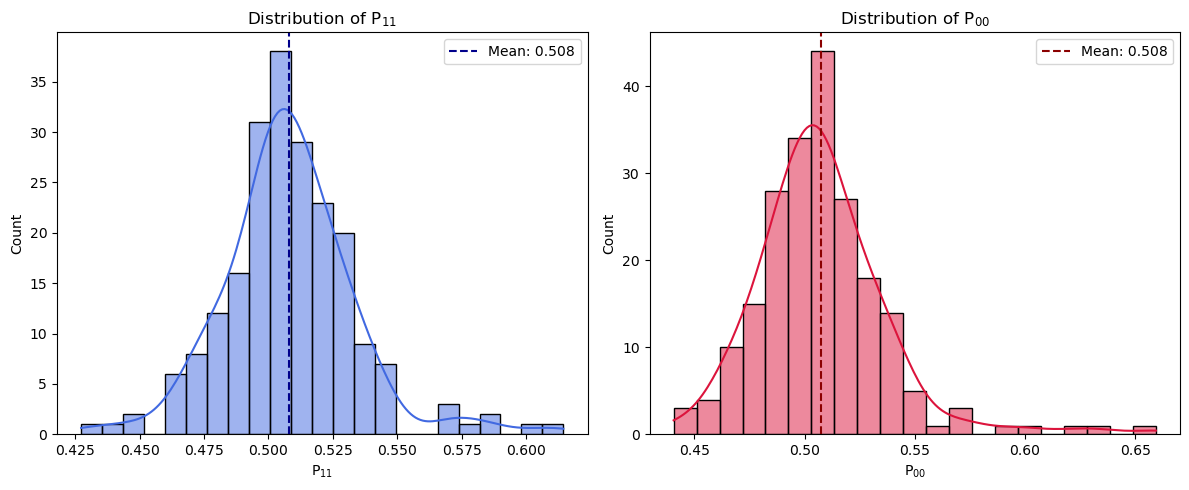

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

heads_mean = df['heads_ratio'].mean()
tails_mean = df['tails_ratio'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='heads_ratio', kde=True, ax=axes[0], color='royalblue')
axes[0].axvline(x=heads_mean, color='darkblue', linestyle='--', label=f'Mean: {heads_mean:.3f}')
axes[0].set_title('Distribution of P$_{11}$')
axes[0].set_xlabel('P$_{11}$')
axes[0].legend()
sns.histplot(data=df, x='tails_ratio', kde=True, ax=axes[1], color='crimson')
axes[1].axvline(x=tails_mean, color='darkred', linestyle='--', label=f'Mean: {tails_mean:.3f}')
axes[1].set_title('Distribution of P$_{00}$')
axes[1].set_xlabel('P$_{00}$')
axes[1].legend()

plt.tight_layout()
plt.show()

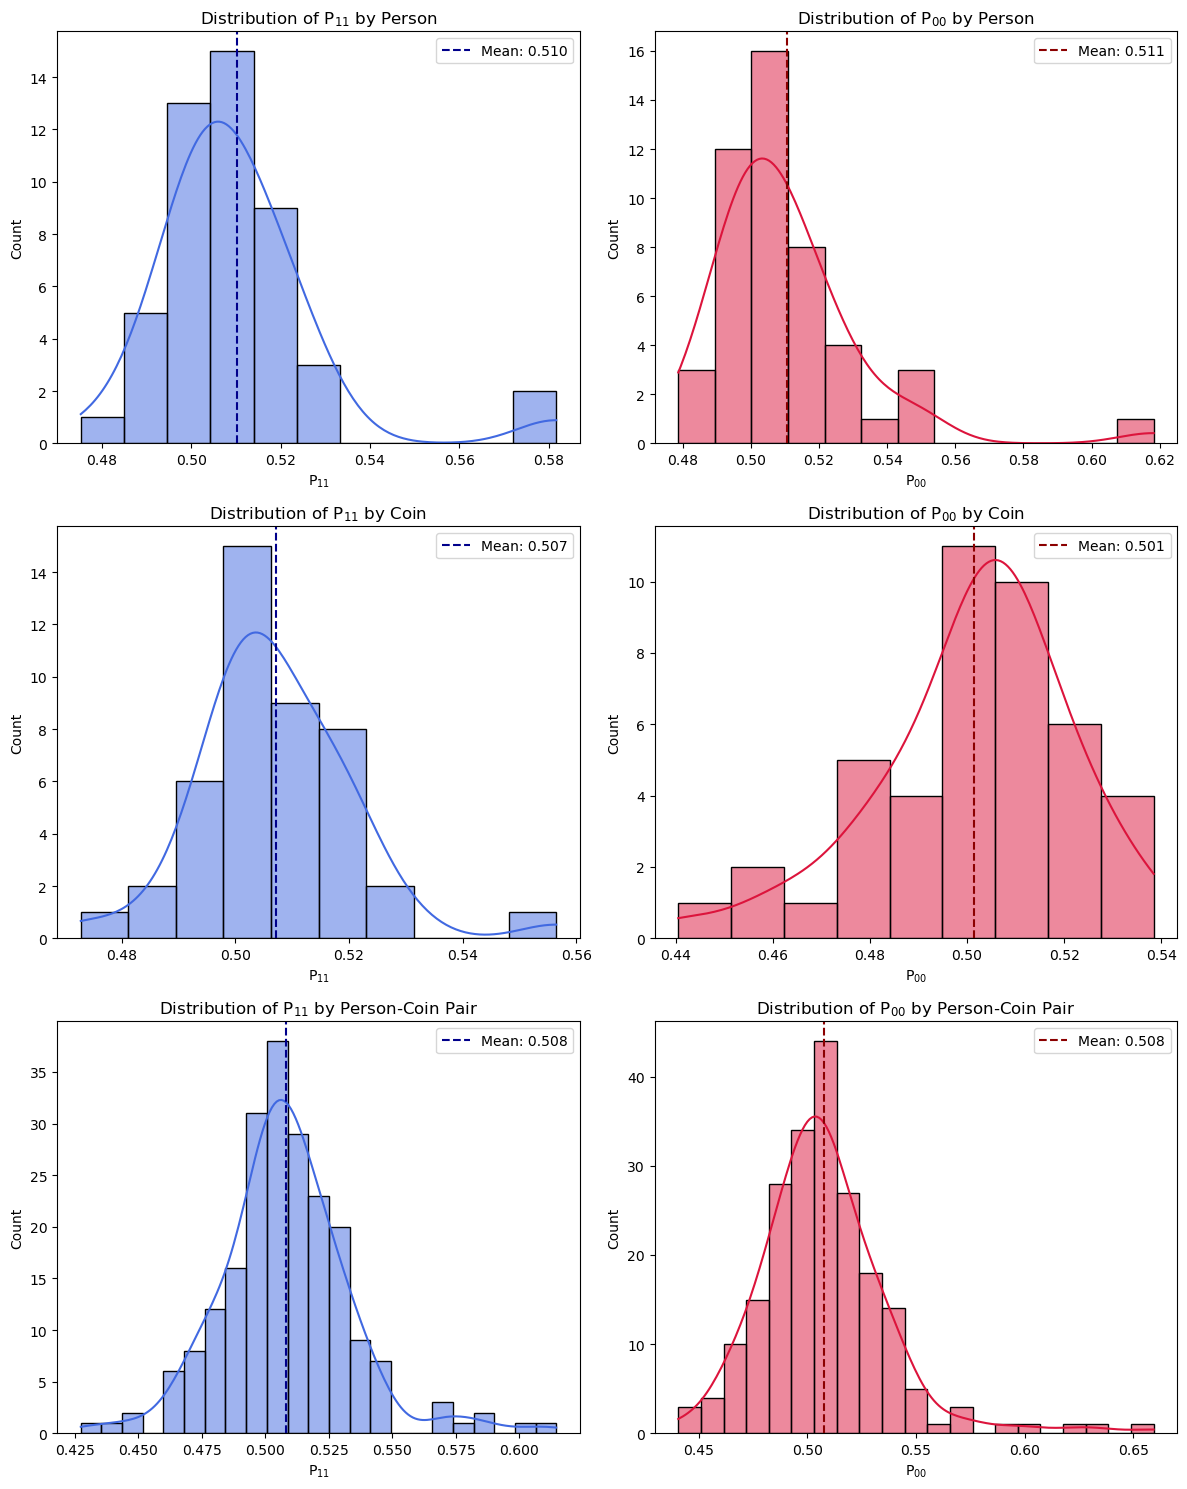

Outliers by Person:

P₁₁ outliers:
Person: JanYang, P₁₁ = 0.582
Person: TianqiPeng, P₁₁ = 0.582

P₀₀ outliers:
Person: TianqiPeng, P₀₀ = 0.618

Outliers by Coin:

P₁₁ outliers:
Coin: 0.50SGD, P₁₁ = 0.556

P₀₀ outliers:
Coin: 0.02EUR, P₀₀ = 0.441

Outliers by Person-Coin Pair:

P₁₁ outliers:
Pair: JanYang-0.50EUR, P₁₁ = 0.615
Pair: MagdaMatetovici-1CAD, P₁₁ = 0.604
Pair: RietvanBork-0.50EUR, P₁₁ = 0.437
Pair: TianqiPeng-0.20EUR, P₁₁ = 0.574
Pair: TianqiPeng-0.50EUR, P₁₁ = 0.586
Pair: TianqiPeng-1EUR, P₁₁ = 0.585
Pair: TingPan-0.50SGD, P₁₁ = 0.576
Pair: VincentOtt-0.50EUR, P₁₁ = 0.450
Pair: XiaochangZhao-0.50SGD, P₁₁ = 0.567
Pair: XiaoyiLin-0.50EUR, P₁₁ = 0.427
Pair: adamF-0.05EUR, P₁₁ = 0.570
Pair: frantisekB-5CZK, P₁₁ = 0.446

P₀₀ outliers:
Pair: AdrianKarami-1GBP, P₀₀ = 0.449
Pair: BohanFu-0.02EUR, P₀₀ = 0.441
Pair: EJ-50CZK, P₀₀ = 0.602
Pair: FranziskaAssion-1DEM, P₀₀ = 0.575
Pair: FranziskaAssion-1EUR, P₀₀ = 0.566
Pair: JanYang-0.50EUR, P₀₀ = 0.593
Pair: KoenDerks-1CAD, P₀₀ = 0.552


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 创建三个不同的分组
results_by_person = []
results_by_coin = []
results_by_pair = []

# 按person分组计算
for person, group in df.groupby("person"):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_tails = group['tails→tails'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()
    
    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_tails = tails_to_tails / N_start_tails_up
    
    results_by_person.append([person, prob_heads_to_heads, prob_tails_to_tails])

# 按coin分组计算
for coin, group in df.groupby("coin"):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_tails = group['tails→tails'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()
    
    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_tails = tails_to_tails / N_start_tails_up
    
    results_by_coin.append([coin, prob_heads_to_heads, prob_tails_to_tails])

# 按person-coin pair分组计算
for (person, coin), group in df.groupby(["person", "coin"]):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_tails = group['tails→tails'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()
    
    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_tails = tails_to_tails / N_start_tails_up
    
    results_by_pair.append([f"{person}-{coin}", prob_heads_to_heads, prob_tails_to_tails])

# 转换为DataFrame
df_person = pd.DataFrame(results_by_person, columns=["person", "prob_heads_to_heads", "prob_tails_to_tails"])
df_coin = pd.DataFrame(results_by_coin, columns=["coin", "prob_heads_to_heads", "prob_tails_to_tails"])
df_pair = pd.DataFrame(results_by_pair, columns=["pair", "prob_heads_to_heads", "prob_tails_to_tails"])

# 创建6张子图
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# By Person
heads_mean = df_person['prob_heads_to_heads'].mean()
tails_mean = df_person['prob_tails_to_tails'].mean()

sns.histplot(data=df_person, x='prob_heads_to_heads', kde=True, ax=axes[0,0], color='royalblue')
axes[0,0].axvline(x=heads_mean, color='darkblue', linestyle='--', label=f'Mean: {heads_mean:.3f}')
axes[0,0].set_title('Distribution of P$_{11}$ by Person')
axes[0,0].set_xlabel('P$_{11}$')
axes[0,0].legend()

sns.histplot(data=df_person, x='prob_tails_to_tails', kde=True, ax=axes[0,1], color='crimson')
axes[0,1].axvline(x=tails_mean, color='darkred', linestyle='--', label=f'Mean: {tails_mean:.3f}')
axes[0,1].set_title('Distribution of P$_{00}$ by Person')
axes[0,1].set_xlabel('P$_{00}$')
axes[0,1].legend()

# By Coin
heads_mean = df_coin['prob_heads_to_heads'].mean()
tails_mean = df_coin['prob_tails_to_tails'].mean()

sns.histplot(data=df_coin, x='prob_heads_to_heads', kde=True, ax=axes[1,0], color='royalblue')
axes[1,0].axvline(x=heads_mean, color='darkblue', linestyle='--', label=f'Mean: {heads_mean:.3f}')
axes[1,0].set_title('Distribution of P$_{11}$ by Coin')
axes[1,0].set_xlabel('P$_{11}$')
axes[1,0].legend()

sns.histplot(data=df_coin, x='prob_tails_to_tails', kde=True, ax=axes[1,1], color='crimson')
axes[1,1].axvline(x=tails_mean, color='darkred', linestyle='--', label=f'Mean: {tails_mean:.3f}')
axes[1,1].set_title('Distribution of P$_{00}$ by Coin')
axes[1,1].set_xlabel('P$_{00}$')
axes[1,1].legend()

# By Pair
heads_mean = df_pair['prob_heads_to_heads'].mean()
tails_mean = df_pair['prob_tails_to_tails'].mean()

sns.histplot(data=df_pair, x='prob_heads_to_heads', kde=True, ax=axes[2,0], color='royalblue')
axes[2,0].axvline(x=heads_mean, color='darkblue', linestyle='--', label=f'Mean: {heads_mean:.3f}')
axes[2,0].set_title('Distribution of P$_{11}$ by Person-Coin Pair')
axes[2,0].set_xlabel('P$_{11}$')
axes[2,0].legend()

sns.histplot(data=df_pair, x='prob_tails_to_tails', kde=True, ax=axes[2,1], color='crimson')
axes[2,1].axvline(x=tails_mean, color='darkred', linestyle='--', label=f'Mean: {tails_mean:.3f}')
axes[2,1].set_title('Distribution of P$_{00}$ by Person-Coin Pair')
axes[2,1].set_xlabel('P$_{00}$')
axes[2,1].legend()

plt.tight_layout()
plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建三个不同的分组
results_by_person = []
results_by_coin = []
results_by_pair = []

# 按person分组计算
for person, group in df.groupby("person"):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_tails = group['tails→tails'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()
    
    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_tails = tails_to_tails / N_start_tails_up
    
    results_by_person.append([person, prob_heads_to_heads, prob_tails_to_tails])

# 按coin分组计算
for coin, group in df.groupby("coin"):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_tails = group['tails→tails'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()
    
    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_tails = tails_to_tails / N_start_tails_up
    
    results_by_coin.append([coin, prob_heads_to_heads, prob_tails_to_tails])

# 按person-coin pair分组计算
for (person, coin), group in df.groupby(["person", "coin"]):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_tails = group['tails→tails'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()
    
    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_tails = tails_to_tails / N_start_tails_up
    
    results_by_pair.append([f"{person}-{coin}", prob_heads_to_heads, prob_tails_to_tails])

# 转换为DataFrame
df_person = pd.DataFrame(results_by_person, columns=["person", "prob_heads_to_heads", "prob_tails_to_tails"])
df_coin = pd.DataFrame(results_by_coin, columns=["coin", "prob_heads_to_heads", "prob_tails_to_tails"])
df_pair = pd.DataFrame(results_by_pair, columns=["pair", "prob_heads_to_heads", "prob_tails_to_tails"])

# 找出异常值（在0.45-0.55范围之外的值）
def find_outliers(df, group_col):
    outliers_heads = df[
        (df['prob_heads_to_heads'] < 0.45) | (df['prob_heads_to_heads'] > 0.55)
    ][[group_col, 'prob_heads_to_heads']]
    
    outliers_tails = df[
        (df['prob_tails_to_tails'] < 0.45) | (df['prob_tails_to_tails'] > 0.55)
    ][[group_col, 'prob_tails_to_tails']]
    
    return outliers_heads, outliers_tails

# 打印各分组的异常值
print("Outliers by Person:")
outliers_heads, outliers_tails = find_outliers(df_person, 'person')
if not outliers_heads.empty:
    print("\nP₁₁ outliers:")
    for _, row in outliers_heads.iterrows():
        print(f"Person: {row['person']}, P₁₁ = {row['prob_heads_to_heads']:.3f}")
if not outliers_tails.empty:
    print("\nP₀₀ outliers:")
    for _, row in outliers_tails.iterrows():
        print(f"Person: {row['person']}, P₀₀ = {row['prob_tails_to_tails']:.3f}")

print("\nOutliers by Coin:")
outliers_heads, outliers_tails = find_outliers(df_coin, 'coin')
if not outliers_heads.empty:
    print("\nP₁₁ outliers:")
    for _, row in outliers_heads.iterrows():
        print(f"Coin: {row['coin']}, P₁₁ = {row['prob_heads_to_heads']:.3f}")
if not outliers_tails.empty:
    print("\nP₀₀ outliers:")
    for _, row in outliers_tails.iterrows():
        print(f"Coin: {row['coin']}, P₀₀ = {row['prob_tails_to_tails']:.3f}")

print("\nOutliers by Person-Coin Pair:")
outliers_heads, outliers_tails = find_outliers(df_pair, 'pair')
if not outliers_heads.empty:
    print("\nP₁₁ outliers:")
    for _, row in outliers_heads.iterrows():
        print(f"Pair: {row['pair']}, P₁₁ = {row['prob_heads_to_heads']:.3f}")
if not outliers_tails.empty:
    print("\nP₀₀ outliers:")
    for _, row in outliers_tails.iterrows():
        print(f"Pair: {row['pair']}, P₀₀ = {row['prob_tails_to_tails']:.3f}")

# 打印所有分组的统计信息
print("\nAll values by person:")
print(df_person[['person', 'prob_heads_to_heads', 'prob_tails_to_tails']].round(3))
print("\nAll values by coin:")
print(df_coin[['coin', 'prob_heads_to_heads', 'prob_tails_to_tails']].round(3))
print("\nAll values by person-coin pair:")
print(df_pair[['pair', 'prob_heads_to_heads', 'prob_tails_to_tails']].round(3))

In [26]:
df_b=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/merged-bachelor.csv")
df_b["person"].unique()

df_i=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/merged-internet.csv")
df_i["person"].unique()

df_mm=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/merged-marathon-Manheim.csv")
df_mm["person"].unique()
df_m=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/merged-marathon.csv")
df_m["person"].unique()
df_mmsc=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/merged-marathon-MSc.csv")
df_mmsc["person"].unique()


df_mp=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/merged-marathon-PhD.csv")
df_mp["person"].unique()

df_p=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/merged-previous.csv")
df_p["person"].unique()

df_t=pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/merged-top-up.csv")
df_t["person"].unique()
# # 收集所有独特的person
# all_persons = set()

# # 从每个数据框中添加unique persons
# all_persons.update(df_b["person"].unique())
# all_persons.update(df_i["person"].unique())
# all_persons.update(df_mm["person"].unique())
# all_persons.update(df_m["person"].unique())
# all_persons.update(df_mmsc["person"].unique())
# all_persons.update(df_mp["person"].unique())
# all_persons.update(df_p["person"].unique())
# all_persons.update(df_t["person"].unique())

# print(f"总共有 {len(all_persons)} 个独特的person")

# # 打印所有独特的person名字
# print("\n所有独特的person名单：")
# for person in sorted(all_persons):
#     print(person)


array(['alexandraS', 'frantisekB'], dtype=object)

In [21]:
# 获取每个数据集中的unique persons
mm_persons = set(df_mm["person"].unique())
m_persons = set(df_m["person"].unique())
mmsc_persons = set(df_mmsc["person"].unique())
mp_persons = set(df_mp["person"].unique())

# 打印每个数据集中的person数量
print(f"marathon-Manheim 中有 {len(mm_persons)} 个独特person")
print(f"marathon 中有 {len(m_persons)} 个独特person")
print(f"marathon-MSc 中有 {len(mmsc_persons)} 个独特person")
print(f"marathon-PhD 中有 {len(mp_persons)} 个独特person")

# 检查数据集之间的重叠
print("\n检查重叠的person：")
print("\nmanheim 和 marathon 的重叠：")
print(mm_persons.intersection(m_persons))

print("\nmanheim 和 MSc 的重叠：")
print(mm_persons.intersection(mmsc_persons))

print("\nmanheim 和 PhD 的重叠：")
print(mm_persons.intersection(mp_persons))

print("\nmarathon 和 MSc 的重叠：")
print(m_persons.intersection(mmsc_persons))

print("\nmarathon 和 PhD 的重叠：")
print(m_persons.intersection(mp_persons))

print("\nMSc 和 PhD 的重叠：")
print(mmsc_persons.intersection(mp_persons))

marathon-Manheim 中有 4 个独特person
marathon 中有 8 个独特person
marathon-MSc 中有 23 个独特person
marathon-PhD 中有 10 个独特person

检查重叠的person：

manheim 和 marathon 的重叠：
set()

manheim 和 MSc 的重叠：
set()

manheim 和 PhD 的重叠：
set()

marathon 和 MSc 的重叠：
{'alexandraS', 'henrikG', 'frantisekB'}

marathon 和 PhD 的重叠：
{'jonasP', 'henrikG', 'frantisekB'}

MSc 和 PhD 的重叠：
{'henrikG', 'frantisekB'}


In [27]:
# Create a dictionary to map each person to their group
person_to_group = {}

# Add mappings for each dataframe
for person in df_b["person"].unique():
    person_to_group[person] = "bachelor"
for person in df_i["person"].unique():
    person_to_group[person] = "internet"
for person in df_m["person"].unique():
    person_to_group[person] = "marathon"
for person in df_mm["person"].unique():
    person_to_group[person] = "marathon-Manheim"
for person in df_mmsc["person"].unique():
    person_to_group[person] = "marathon-MSc"
for person in df_mp["person"].unique():
    person_to_group[person] = "marathon-PhD"
for person in df_p["person"].unique():
    person_to_group[person] = "previous"
for person in df_t["person"].unique():
    person_to_group[person] = "top-up"

# Add the new column to df
df["group"] = df["person"].map(person_to_group)

In [28]:
df.to_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv", index=False)

350,757次实验
48 people 
211 different coins

(heads→heads+tails→heads)/(N_start_heads_up+N_start_tails_up)=1/2
heads→heads/N_start_heads_up=1/2
tails→heads/N_start_tails_up=1/2

根据人分组的话，
JanYang	0.081528	
TianqiPeng	0.081655	-0.118232
有点奇怪

根据硬币分组的话，
1     0.02EUR
16    0.50SGD


In [8]:
min_value_row = results_df.loc[results_df["prob_heads_to_heads"].idxmax()]
print(min_value_row)
#blue max 0.50SGD 
#blue min 0.01GBP 
#o max 0.02EUR
#o min 1MXN



coin                    0.50SGD
prob_heads_to_heads    0.056474
prob_tails_to_heads   -0.017682
total_prob             0.021036
total_num                  2781
Name: 16, dtype: object


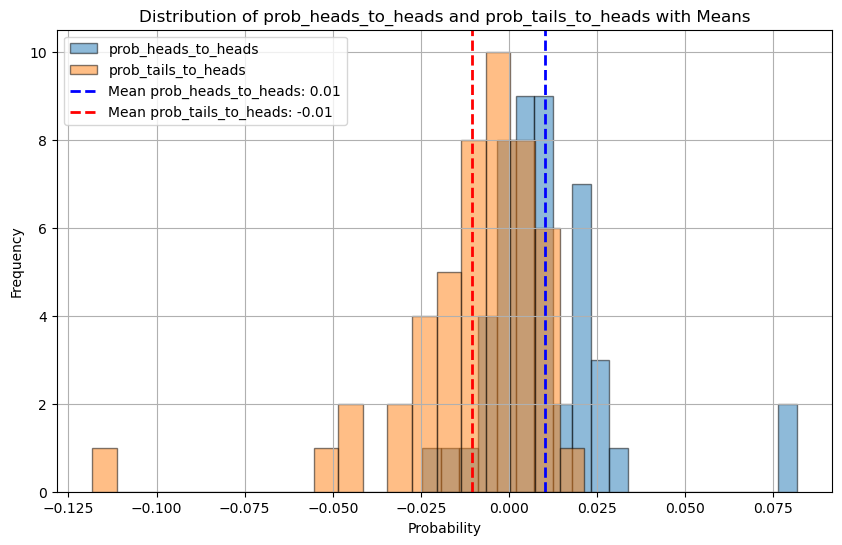

Shapiro-Wilk test for prob_heads_to_heads: ShapiroResult(statistic=0.8022405309351803, pvalue=1.4611680648830554e-06)
Shapiro-Wilk test for prob_tails_to_heads: ShapiroResult(statistic=0.7862439963263381, pvalue=6.437023915300297e-07)
t-statistic: 4.888071775180192
p-value: 4.183751594921535e-06
There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).
KS-statistic: 0.4583333333333333
P-value: 6.38004158410171e-05
There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
df_grouped = df.groupby("person")
def calculate_probabilities(group):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_heads = group['tails→heads'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()

    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_heads = tails_to_heads / N_start_tails_up

    total_prob = (heads_to_heads + tails_to_heads) / (N_start_heads_up + N_start_tails_up)
    total_num = N_start_heads_up + N_start_tails_up
    return prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num

results = []

for person, group in df_grouped:
    prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num = calculate_probabilities(group)
    results.append([person, prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num])

results_df = pd.DataFrame(results, columns=["coin", "prob_heads_to_heads", "prob_tails_to_heads", "total_prob", "total_num"])

results_df["prob_heads_to_heads"] = results_df["prob_heads_to_heads"] - 0.5
results_df["prob_tails_to_heads"] = results_df["prob_tails_to_heads"] - 0.5
results_df["total_prob"] = results_df["total_prob"] - 0.5

# filtered_df = results_df[(results_df["prob_heads_to_heads"] > 0.05) |
#                          (results_df["prob_tails_to_heads"] > 0.05) |
#                          (results_df["total_prob"] > 0.05)]

# # 打印出符合条件的person
# filtered_persons = filtered_df["coin"]
# filtered_persons

plt.figure(figsize=(10, 6))

# Plot for "prob_heads_to_heads"
plt.hist(results_df["prob_heads_to_heads"], bins=20, edgecolor='black', alpha=0.5, label='prob_heads_to_heads')

# Plot for "prob_tails_to_heads"
plt.hist(results_df["prob_tails_to_heads"], bins=20, edgecolor='black', alpha=0.5, label='prob_tails_to_heads')

# Add vertical lines for the means
mean_heads_to_heads = results_df["prob_heads_to_heads"].mean()
mean_tails_to_heads = results_df["prob_tails_to_heads"].mean()

plt.axvline(mean_heads_to_heads, color='blue', linestyle='dashed', linewidth=2, label=f'Mean prob_heads_to_heads: {mean_heads_to_heads:.2f}')
plt.axvline(mean_tails_to_heads, color='red', linestyle='dashed', linewidth=2, label=f'Mean prob_tails_to_heads: {mean_tails_to_heads:.2f}')

# Title and labels
plt.title('Distribution of prob_heads_to_heads and prob_tails_to_heads with Means')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

import scipy.stats as stats

shapiro_heads = stats.shapiro(results_df["prob_heads_to_heads"])
shapiro_tails = stats.shapiro(results_df["prob_tails_to_heads"])

print("Shapiro-Wilk test for prob_heads_to_heads:", shapiro_heads)
print("Shapiro-Wilk test for prob_tails_to_heads:", shapiro_tails)

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(results_df["prob_heads_to_heads"], results_df["prob_tails_to_heads"])

# Output the results of the t-test
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).")
else:
    print("There is no significant difference between prob_heads_to_heads and prob_tails_to_heads (fail to reject H0).")
import scipy.stats as stats

# Assuming results_df is already loaded and contains 'prob_heads_to_heads' and 'prob_tails_to_heads'

# Perform the Kolmogorov-Smirnov test for two samples
ks_stat, p_value = stats.ks_2samp(results_df["prob_heads_to_heads"], results_df["prob_tails_to_heads"])

# Output the results of the KS test
print(f"KS-statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    result = "There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0)."
else:
    result = "There is no significant difference between prob_heads_to_heads and prob_tails_to_heads (fail to reject H0)."

print(result)


In [54]:
min_value_row = results_df.loc[results_df["prob_tails_to_heads"].idxmin()]
print(min_value_row)

#TianqiPeng



coin                   TianqiPeng
prob_heads_to_heads      0.081655
prob_tails_to_heads     -0.118232
total_prob                -0.0225
total_num                    2800
Name: 29, dtype: object


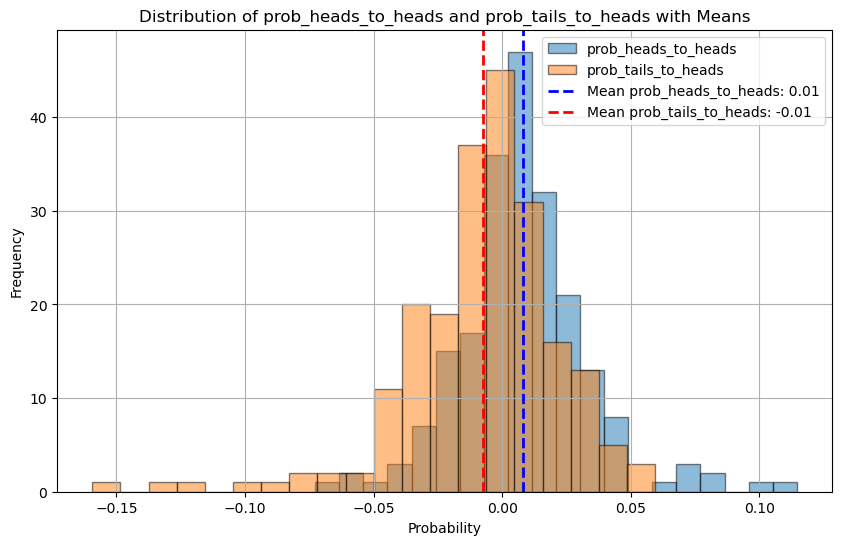

Shapiro-Wilk test for prob_heads_to_heads: ShapiroResult(statistic=0.9529785777825737, pvalue=2.0928551758856594e-06)
Shapiro-Wilk test for prob_tails_to_heads: ShapiroResult(statistic=0.9135359585390412, pvalue=9.435648459376882e-10)
t-statistic: 5.737441461352336
p-value: 1.841940113578931e-08
There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).


In [56]:
import pandas as pd

# 假设 df 已经是你加载的数据
# 先按'person'和'coin'列进行分组
df_grouped = df.groupby(["person", "coin"])

# 定义函数用于计算每个group的概率
def calculate_probabilities(group):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_heads = group['tails→heads'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()

    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_heads = tails_to_heads / N_start_tails_up

    total_prob = (heads_to_heads + tails_to_heads) / (N_start_heads_up + N_start_tails_up)
    total_num = N_start_heads_up + N_start_tails_up
    return prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num

# 创建一个空的 DataFrame 来存储结果
results = []

# 遍历每个分组（每个person和coin组合）
for (person, coin), group in df_grouped:
    prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num = calculate_probabilities(group)
    # 将结果保存到列表中
    results.append([person, coin, prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num])

# 将结果转换为 DataFrame
results_df = pd.DataFrame(results, columns=["person", "coin", "prob_heads_to_heads", "prob_tails_to_heads", "total_prob", "total_num"])

# 减去0.5
results_df["prob_heads_to_heads"] = results_df["prob_heads_to_heads"] - 0.5
results_df["prob_tails_to_heads"] = results_df["prob_tails_to_heads"] - 0.5
results_df["total_prob"] = results_df["total_prob"] - 0.5
# # 只要其中一列大于0.01就过滤出来
# filtered_df = results_df[(results_df["prob_heads_to_heads"] > 0.02) |
#                          (results_df["prob_tails_to_heads"] > 0.02) |
#                          (results_df["total_prob"] > 0.02)]

# filtered_persons_and_coins = filtered_df[["person", "coin"]]
# filtered_persons_and_coins

plt.figure(figsize=(10, 6))

# Plot for "prob_heads_to_heads"
plt.hist(results_df["prob_heads_to_heads"], bins=20, edgecolor='black', alpha=0.5, label='prob_heads_to_heads')

# Plot for "prob_tails_to_heads"
plt.hist(results_df["prob_tails_to_heads"], bins=20, edgecolor='black', alpha=0.5, label='prob_tails_to_heads')

# Add vertical lines for the means
mean_heads_to_heads = results_df["prob_heads_to_heads"].mean()
mean_tails_to_heads = results_df["prob_tails_to_heads"].mean()

plt.axvline(mean_heads_to_heads, color='blue', linestyle='dashed', linewidth=2, label=f'Mean prob_heads_to_heads: {mean_heads_to_heads:.2f}')
plt.axvline(mean_tails_to_heads, color='red', linestyle='dashed', linewidth=2, label=f'Mean prob_tails_to_heads: {mean_tails_to_heads:.2f}')

# Title and labels
plt.title('Distribution of prob_heads_to_heads and prob_tails_to_heads with Means')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

import scipy.stats as stats

# Perform a Shapiro-Wilk test for normality
shapiro_heads = stats.shapiro(results_df["prob_heads_to_heads"])
shapiro_tails = stats.shapiro(results_df["prob_tails_to_heads"])

print("Shapiro-Wilk test for prob_heads_to_heads:", shapiro_heads)
print("Shapiro-Wilk test for prob_tails_to_heads:", shapiro_tails)

t_stat, p_value = stats.ttest_ind(results_df["prob_heads_to_heads"], results_df["prob_tails_to_heads"])

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).")
else:
    print("There is no significant difference between prob_heads_to_heads and prob_tails_to_heads (fail to reject H0).")


In [59]:
min_value_row = results_df.loc[results_df["prob_heads_to_heads"].idxmin()]
print(min_value_row)
# o min TianqiPeng 0.20EUR
# b max JanYang  0.50EUR




person                  JanYang
coin                    0.50EUR
prob_heads_to_heads    0.114537
prob_tails_to_heads   -0.092677
total_prob             0.012907
total_num                   891
Name: 51, dtype: object


In [62]:
n = 3  # 你可以调整n的值来获取前n个最小值
smallest_rows = results_df.nsmallest(n, "prob_tails_to_heads")
print(smallest_rows)


              person     coin  prob_heads_to_heads  prob_tails_to_heads  \
125       TianqiPeng  0.20EUR             0.073661            -0.159420   
81   MagdaMatetovici     1CAD             0.104167            -0.134615   
126       TianqiPeng  0.50EUR             0.086047            -0.121277   

     total_prob  total_num  
125   -0.055000       1000  
81    -0.020000        100  
126   -0.022222        900  


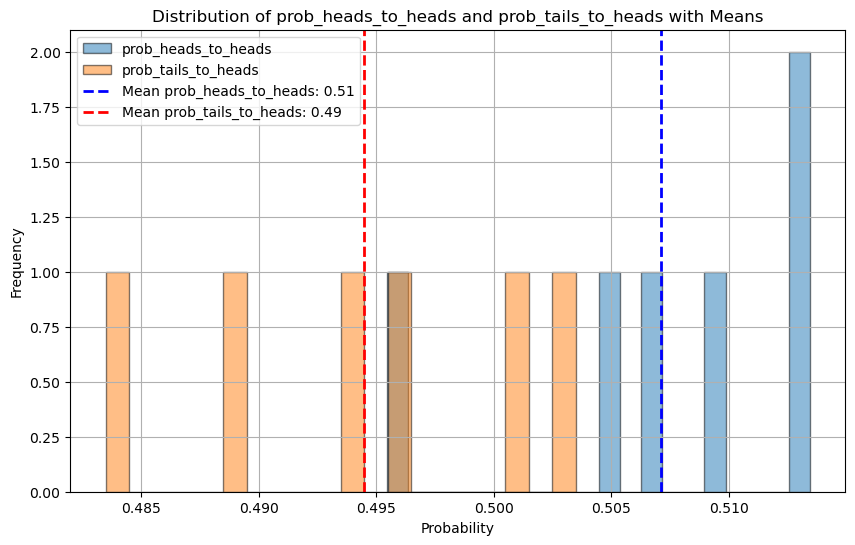

Shapiro-Wilk test for prob_heads_to_heads: ShapiroResult(statistic=0.8958829349184183, pvalue=0.350166444430666)
Shapiro-Wilk test for prob_tails_to_heads: ShapiroResult(statistic=0.9677873743307422, pvalue=0.8772552786407074)
t-statistic: 3.0633418072676437
p-value: 0.011976026617593899
There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).
KS-statistic: 0.8333333333333334
P-value: 0.025974025974025972
There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
df_grouped = df.groupby("group")
def calculate_probabilities(group):
    heads_to_heads = group['heads→heads'].sum()
    tails_to_heads = group['tails→heads'].sum()
    N_start_heads_up = group['N_start_heads_up'].sum()
    N_start_tails_up = group['N_start_tails_up'].sum()

    prob_heads_to_heads = heads_to_heads / N_start_heads_up
    prob_tails_to_heads = tails_to_heads / N_start_tails_up

    total_prob = (heads_to_heads + tails_to_heads) / (N_start_heads_up + N_start_tails_up)
    total_num = N_start_heads_up + N_start_tails_up
    return prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num

results = []

for person, group in df_grouped:
    prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num = calculate_probabilities(group)
    results.append([person, prob_heads_to_heads, prob_tails_to_heads, total_prob, total_num])

results_df = pd.DataFrame(results, columns=["group", "prob_heads_to_heads", "prob_tails_to_heads", "total_prob", "total_num"])

# results_df["prob_heads_to_heads"] = results_df["prob_heads_to_heads"] - 0.5
# results_df["prob_tails_to_heads"] = results_df["prob_tails_to_heads"] - 0.5
# results_df["total_prob"] = results_df["total_prob"] - 0.5

# filtered_df = results_df[(results_df["prob_heads_to_heads"] > 0.05) |
#                          (results_df["prob_tails_to_heads"] > 0.05) |
#                          (results_df["total_prob"] > 0.05)]

# # 打印出符合条件的person
# filtered_persons = filtered_df["coin"]
# filtered_persons

plt.figure(figsize=(10, 6))

# Plot for "prob_heads_to_heads"
plt.hist(results_df["prob_heads_to_heads"], bins=20, edgecolor='black', alpha=0.5, label='prob_heads_to_heads')

# Plot for "prob_tails_to_heads"
plt.hist(results_df["prob_tails_to_heads"], bins=20, edgecolor='black', alpha=0.5, label='prob_tails_to_heads')

# Add vertical lines for the means
mean_heads_to_heads = results_df["prob_heads_to_heads"].mean()
mean_tails_to_heads = results_df["prob_tails_to_heads"].mean()

plt.axvline(mean_heads_to_heads, color='blue', linestyle='dashed', linewidth=2, label=f'Mean prob_heads_to_heads: {mean_heads_to_heads:.2f}')
plt.axvline(mean_tails_to_heads, color='red', linestyle='dashed', linewidth=2, label=f'Mean prob_tails_to_heads: {mean_tails_to_heads:.2f}')

# Title and labels
plt.title('Distribution of prob_heads_to_heads and prob_tails_to_heads with Means')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

import scipy.stats as stats

# Perform a Shapiro-Wilk test for normality
shapiro_heads = stats.shapiro(results_df["prob_heads_to_heads"])
shapiro_tails = stats.shapiro(results_df["prob_tails_to_heads"])

print("Shapiro-Wilk test for prob_heads_to_heads:", shapiro_heads)
print("Shapiro-Wilk test for prob_tails_to_heads:", shapiro_tails)

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(results_df["prob_heads_to_heads"], results_df["prob_tails_to_heads"])

# Output the results of the t-test
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).")
else:
    print("There is no significant difference between prob_heads_to_heads and prob_tails_to_heads (fail to reject H0).")
import scipy.stats as stats

# Assuming results_df is already loaded and contains 'prob_heads_to_heads' and 'prob_tails_to_heads'

# Perform the Kolmogorov-Smirnov test for two samples
ks_stat, p_value = stats.ks_2samp(results_df["prob_heads_to_heads"], results_df["prob_tails_to_heads"])

# Output the results of the KS test
print(f"KS-statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    result = "There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0)."
else:
    result = "There is no significant difference between prob_heads_to_heads and prob_tails_to_heads (fail to reject H0)."

print(result)


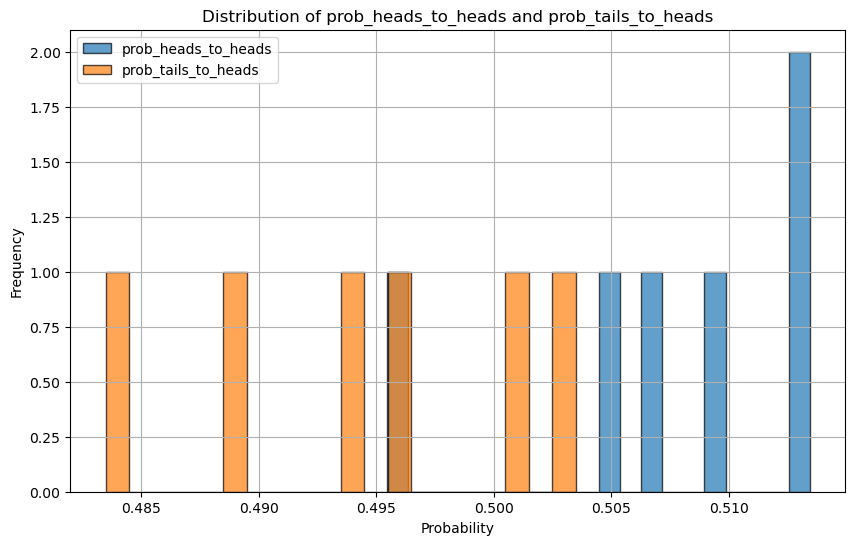

In [30]:
import matplotlib.pyplot as plt

# 假设 results_df 已经加载并包含了相关列
# 例如：prob_heads_to_heads 和 prob_tails_to_heads

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制 prob_heads_to_heads 的直方图
plt.hist(results_df["prob_heads_to_heads"], bins=20, edgecolor='black', alpha=0.7, label='prob_heads_to_heads')

# 绘制 prob_tails_to_heads 的直方图
plt.hist(results_df["prob_tails_to_heads"], bins=20, edgecolor='black', alpha=0.7, label='prob_tails_to_heads')

# 添加标题和标签
plt.title('Distribution of prob_heads_to_heads and prob_tails_to_heads')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


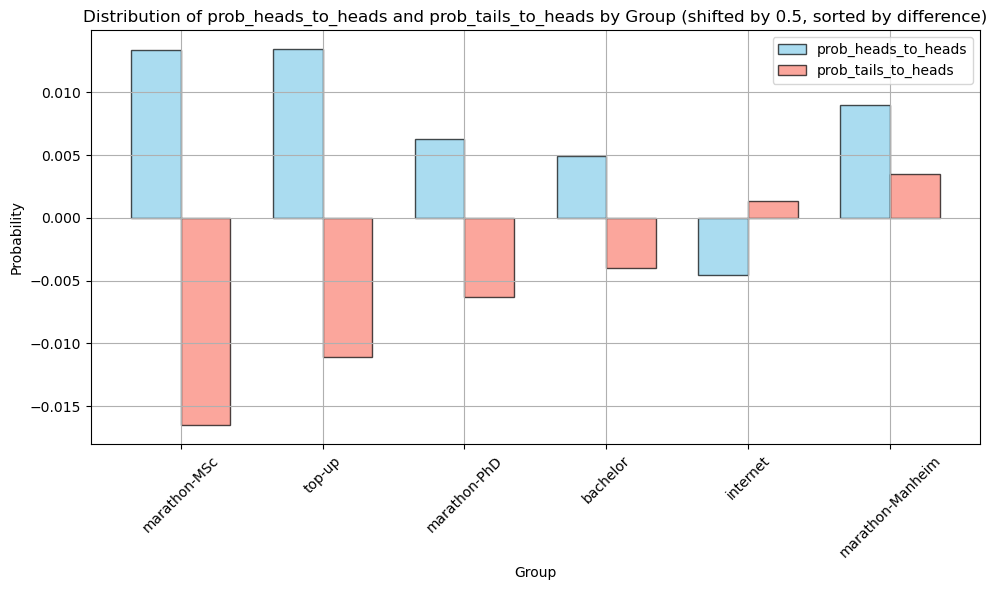

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 计算 prob_heads_to_heads 和 prob_tails_to_heads 的差值，并按降序排列
results_df["difference"] = abs(results_df["prob_heads_to_heads"] - results_df["prob_tails_to_heads"])
results_df_sorted = results_df.sort_values(by="difference", ascending=False)

# 将 prob_heads_to_heads 和 prob_tails_to_heads 都减去 0.5
results_df_sorted["prob_heads_to_heads"] = results_df_sorted["prob_heads_to_heads"] - 0.5
results_df_sorted["prob_tails_to_heads"] = results_df_sorted["prob_tails_to_heads"] - 0.5

# 创建绘图
fig, ax = plt.subplots(figsize=(10, 6))

# 设置条形图的宽度
bar_width = 0.35

# 设置x轴位置
index = np.arange(len(results_df_sorted['group']))

# 绘制 prob_heads_to_heads 的条形图
ax.bar(index, results_df_sorted["prob_heads_to_heads"], bar_width, edgecolor='black', alpha=0.7, label='prob_heads_to_heads', color='skyblue')

# 绘制 prob_tails_to_heads 的条形图，稍微偏移一下位置
ax.bar(index + bar_width, results_df_sorted["prob_tails_to_heads"], bar_width, edgecolor='black', alpha=0.7, label='prob_tails_to_heads', color='salmon')

# 添加标题和标签
ax.set_title('Distribution of prob_heads_to_heads and prob_tails_to_heads by Group (shifted by 0.5, sorted by difference)')
ax.set_xlabel('Group')
ax.set_ylabel('Probability')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_df_sorted['group'], rotation=45)

# 添加图例
ax.legend()

# 显示网格
ax.grid(True)

# 显示图形
plt.tight_layout()
plt.show()


In [65]:
results_df

,group,prob_heads_to_heads,prob_tails_to_heads,total_prob,total_num,difference
0,bachelor,0.504961,0.495994,0.500426,75036,0.008967
1,internet,0.495464,0.501367,0.498433,31272,0.005903
2,marathon-MSc,0.513412,0.483468,0.498390,72343,0.029944
3,marathon-Manheim,0.508997,0.503486,0.506279,41009,0.005512
4,marathon-PhD,0.506264,0.493676,0.499968,63078,0.012588
5,top-up,0.513457,0.488897,0.501199,37534,0.024560


In [51]:
import scipy.stats as stats

# Assuming results_df is already loaded and contains 'prob_heads_to_heads' and 'prob_tails_to_heads'

# Perform the Kolmogorov-Smirnov test for two samples
ks_stat, p_value = stats.ks_2samp(results_df["prob_heads_to_heads"], results_df["prob_tails_to_heads"])

# Output the results of the KS test
print(f"KS-statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    result = "There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0)."
else:
    result = "There is no significant difference between prob_heads_to_heads and prob_tails_to_heads (fail to reject H0)."

print(result)


KS-statistic: 0.27014218009478674
P-value: 3.5183417003117937e-07
There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).


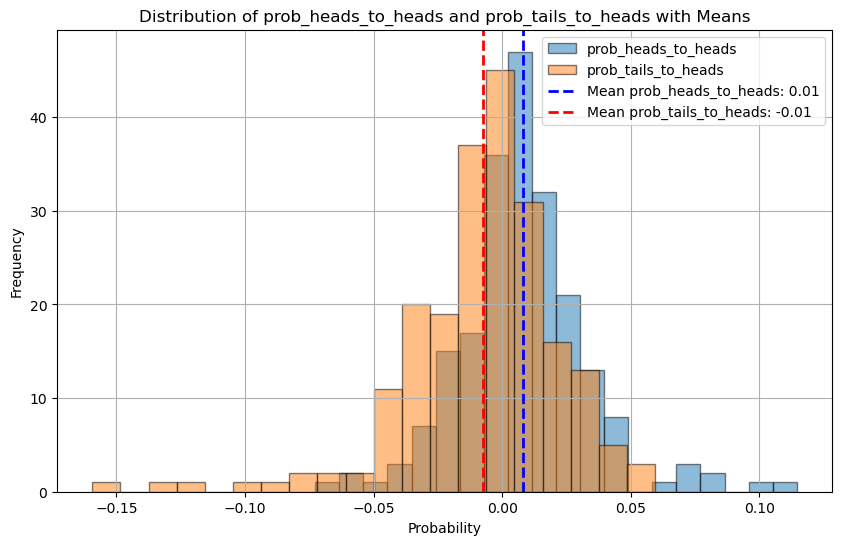

In [61]:

plt.figure(figsize=(10, 6))

# Plot for "prob_heads_to_heads"
plt.hist(results_df["prob_heads_to_heads"], bins=20, edgecolor='black', alpha=0.5, label='prob_heads_to_heads')

# Plot for "prob_tails_to_heads"
plt.hist(results_df["prob_tails_to_heads"], bins=20, edgecolor='black', alpha=0.5, label='prob_tails_to_heads')

# Add vertical lines for the means
mean_heads_to_heads = results_df["prob_heads_to_heads"].mean()
mean_tails_to_heads = results_df["prob_tails_to_heads"].mean()

plt.axvline(mean_heads_to_heads, color='blue', linestyle='dashed', linewidth=2, label=f'Mean prob_heads_to_heads: {mean_heads_to_heads:.2f}')
plt.axvline(mean_tails_to_heads, color='red', linestyle='dashed', linewidth=2, label=f'Mean prob_tails_to_heads: {mean_tails_to_heads:.2f}')

# Title and labels
plt.title('Distribution of prob_heads_to_heads and prob_tails_to_heads with Means')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [57]:
import scipy.stats as stats

# Perform a Shapiro-Wilk test for normality
shapiro_heads = stats.shapiro(results_df["prob_heads_to_heads"])
shapiro_tails = stats.shapiro(results_df["prob_tails_to_heads"])

print("Shapiro-Wilk test for prob_heads_to_heads:", shapiro_heads)
print("Shapiro-Wilk test for prob_tails_to_heads:", shapiro_tails)

t_stat, p_value = stats.ttest_ind(results_df["prob_heads_to_heads"], results_df["prob_tails_to_heads"])

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).")
else:
    print("There is no significant difference between prob_heads_to_heads and prob_tails_to_heads (fail to reject H0).")
import scipy.stats as stats

# Assuming results_df is already loaded and contains 'prob_heads_to_heads' and 'prob_tails_to_heads'

# Perform the Kolmogorov-Smirnov test for two samples
ks_stat, p_value = stats.ks_2samp(results_df["prob_heads_to_heads"], results_df["prob_tails_to_heads"])

# Output the results of the KS test
print(f"KS-statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    result = "There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0)."
else:
    result = "There is no significant difference between prob_heads_to_heads and prob_tails_to_heads (fail to reject H0)."

print(result)


Shapiro-Wilk test for prob_heads_to_heads: ShapiroResult(statistic=0.9529785777825734, pvalue=2.092855175885543e-06)
Shapiro-Wilk test for prob_tails_to_heads: ShapiroResult(statistic=0.9135359585390408, pvalue=9.435648459376262e-10)
t-statistic: 5.7374414613523514
p-value: 1.8419401135787832e-08
There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).
KS-statistic: 0.27014218009478674
P-value: 3.5183417003117937e-07
There is a significant difference between prob_heads_to_heads and prob_tails_to_heads (reject H0).


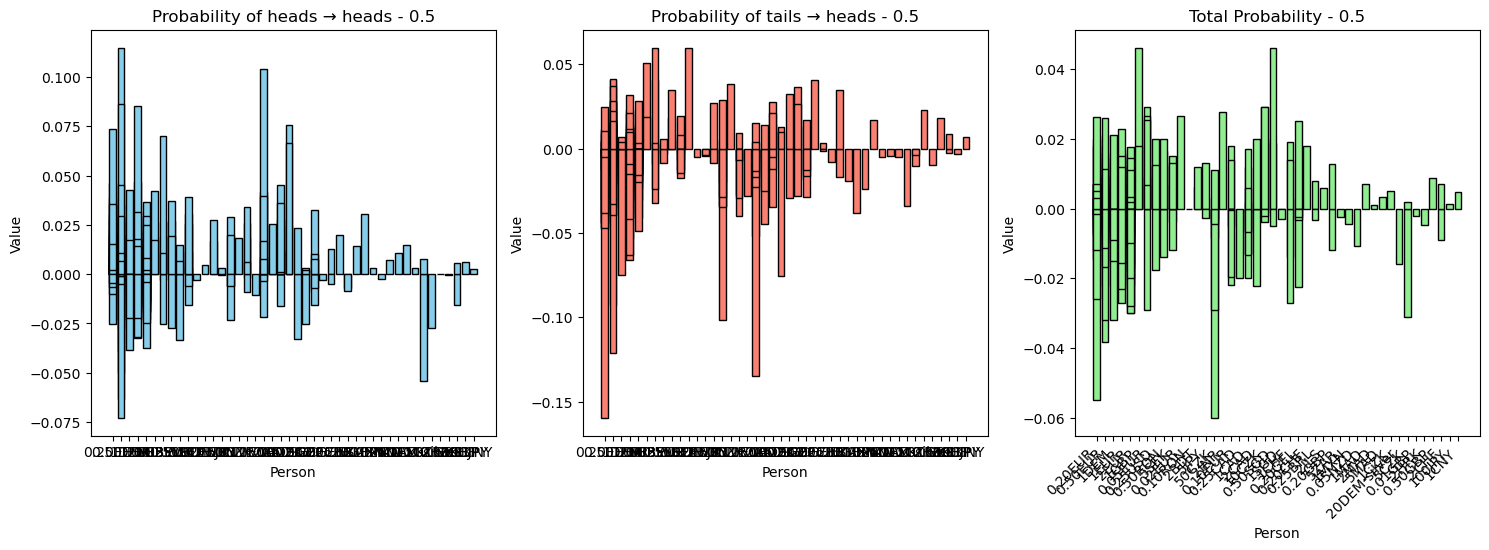

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(results_df["coin"], results_df["prob_heads_to_heads"], color='skyblue', edgecolor='black')
plt.title('Probability of heads → heads - 0.5')
plt.xlabel('Person')
plt.ylabel('Value')

plt.subplot(132)
plt.bar(results_df["coin"], results_df["prob_tails_to_heads"], color='salmon', edgecolor='black')
plt.title('Probability of tails → heads - 0.5')
plt.xlabel('Person')
plt.ylabel('Value')

plt.subplot(133)
plt.bar(results_df["coin"], results_df["total_prob"], color='lightgreen', edgecolor='black')
plt.title('Total Probability - 0.5')
plt.xlabel('Person')
plt.ylabel('Value')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

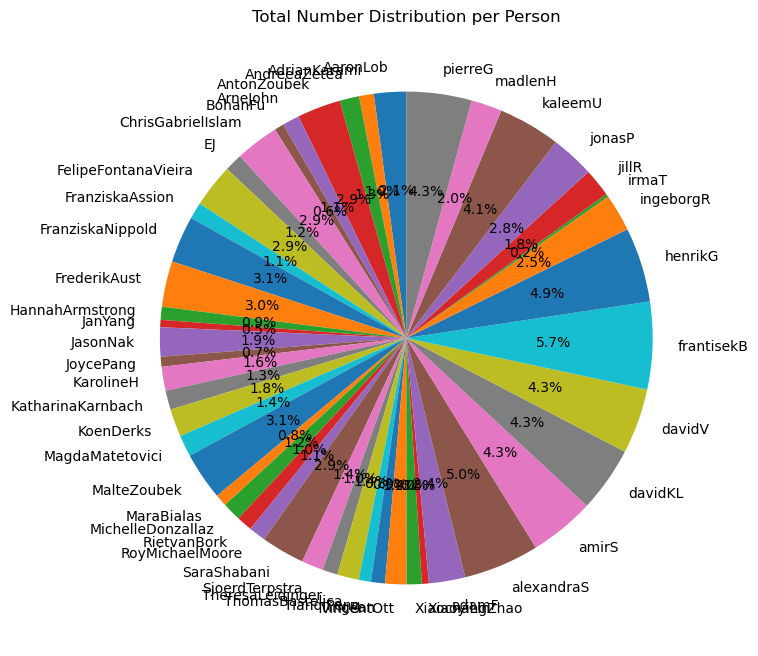

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# 使用results_df中的total_num数据绘制扇形图
plt.pie(results_df["total_num"], labels=results_df["person"], autopct='%1.1f%%', startangle=90)

# 设置标题
plt.title('Total Number Distribution per Person')

# 显示图形
plt.show()

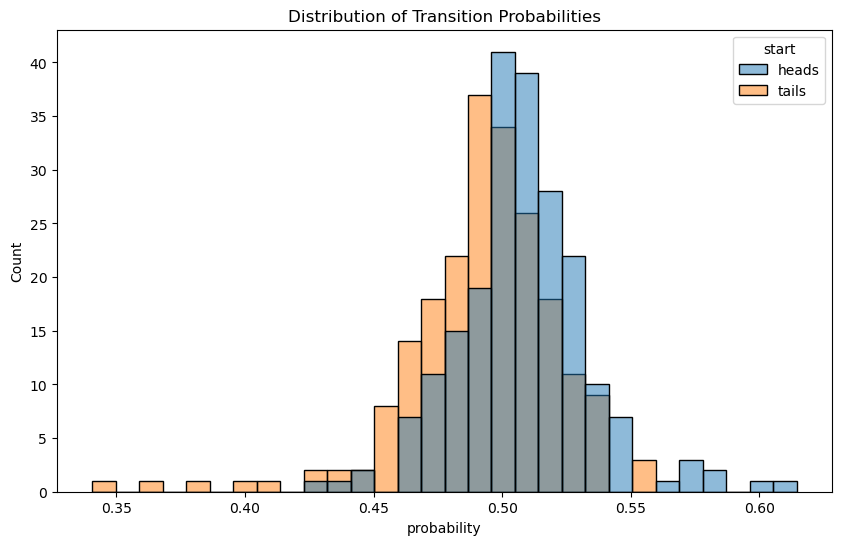

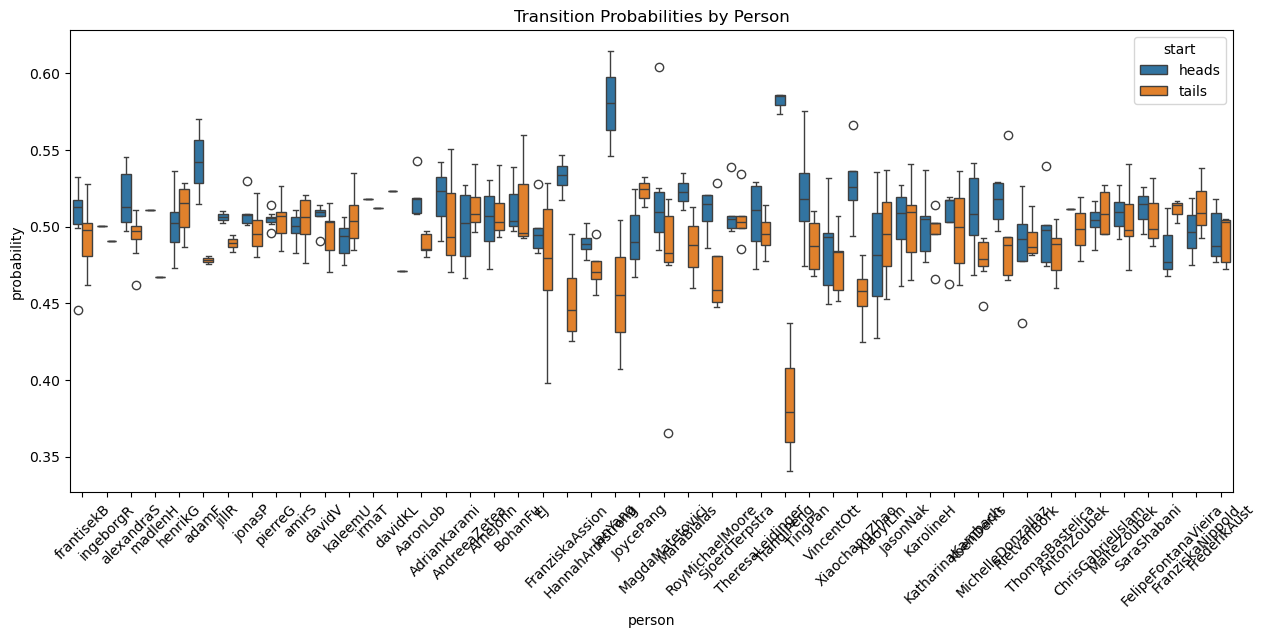


Outliers detected:
Empty DataFrame
Columns: [person, coin, start, probability, y, m]
Index: []

Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  422
Model:                            GLM   Df Residuals:                      418
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5853e+05
Date:                Tue, 10 Dec 2024   Deviance:                       685.76
Time:                        18:09:47   Pearson chi2:                     683.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1810
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
------------------

/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_11582/2329479430.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = df_combined.groupby(['person', 'coin', 'start']).apply(find_outliers)
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


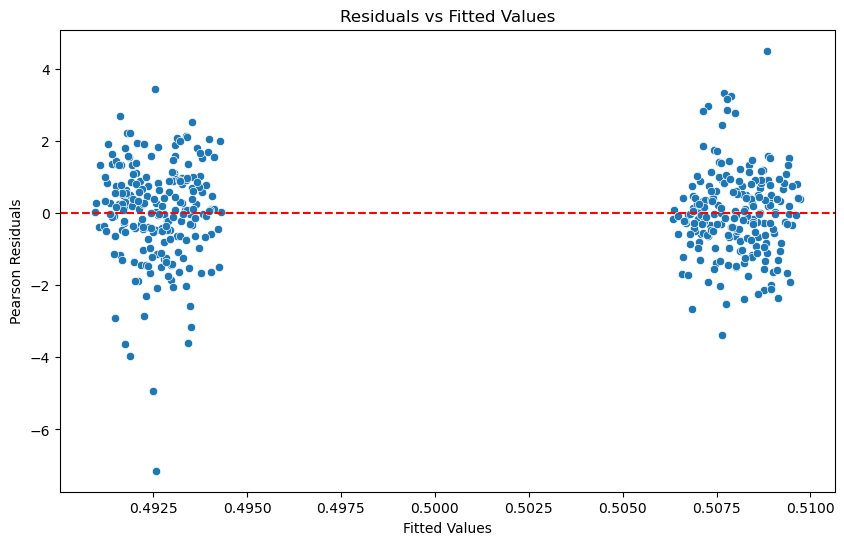


Person Mapping:
0                AaronLob
1            AdrianKarami
2            AndreeaZetea
3             AntonZoubek
4                ArneJohn
5                 BohanFu
6       ChrisGabrielIslam
7                      EJ
8     FelipeFontanaVieira
9         FranziskaAssion
10       FranziskaNippold
11           FrederikAust
12        HannahArmstrong
13                JanYang
14               JasonNak
15              JoycePang
16              KarolineH
17      KatharinaKarnbach
18              KoenDerks
19        MagdaMatetovici
20            MalteZoubek
21             MaraBialas
22      MichelleDonzallaz
23            RietvanBork
24        RoyMichaelMoore
25            SaraShabani
26         SjoerdTerpstra
27       TheresaLeidinger
28        ThomasBastelica
29             TianqiPeng
30                TingPan
31             VincentOtt
32          XiaochangZhao
33              XiaoyiLin
34                  adamF
35             alexandraS
36                  amirS
37                dav

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据
df = pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv")

# 确保数值列为数值类型
numeric_columns = ['heads_heads', 'tails_heads', 'N_start_heads_up', 'N_start_tails_up']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. 数据预处理
# 创建df1（heads to heads）
df1 = df[['heads_heads', 'N_start_heads_up', 'person', 'coin']].copy()
df1.columns = ['y', 'm', 'person', 'coin']

# 创建df2（tails to heads）
df2 = df[['tails_heads', 'N_start_tails_up', 'person', 'coin']].copy()
df2.columns = ['y', 'm', 'person', 'coin']

# 3. 合并数据
n = len(df)
start = ['heads'] * n + ['tails'] * n
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined['start'] = start

# 4. 计算转换概率
df_combined['probability'] = df_combined['y'].astype(float) / df_combined['m'].astype(float)

# 5. 探索性数据分析
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='probability', hue='start', bins=30)
plt.title('Distribution of Transition Probabilities')
plt.show()

# 按人员分组的箱线图
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_combined, x='person', y='probability', hue='start')
plt.xticks(rotation=45)
plt.title('Transition Probabilities by Person')
plt.show()

# 异常值检测
def find_outliers(group):
    q1 = group['probability'].quantile(0.25)
    q3 = group['probability'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['probability'] < lower_bound) | 
                    (group['probability'] > upper_bound)]
    return outliers

# 按person/coin组合检测异常值
outliers = df_combined.groupby(['person', 'coin', 'start']).apply(find_outliers)
print("\nOutliers detected:")
print(outliers[['person', 'coin', 'start', 'probability', 'y', 'm']])

# 6. GLM建模
# 将分类变量转换为数值编码
df_combined['person_code'] = pd.Categorical(df_combined['person']).codes
df_combined['coin_code'] = pd.Categorical(df_combined['coin']).codes
df_combined['start_code'] = (df_combined['start'] == 'heads').astype(int)

# 创建模型矩阵
X = sm.add_constant(df_combined[['person_code', 'coin_code', 'start_code']])
y = df_combined['y'].astype(float)
m = df_combined['m'].astype(float)

# 拟合模型
model = sm.GLM(y/m, 
               X,
               family=sm.families.Binomial(sm.families.links.logit()), 
               var_weights=m)
results = model.fit()

print("\nModel Summary:")
print(results.summary())

# 7. 残差分析
residuals = results.resid_pearson
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Pearson Residuals')
plt.show()

# 8. 保存编码映射以便解释结果
person_mapping = pd.Series(pd.Categorical(df_combined['person']).categories, 
                          index=range(len(pd.Categorical(df_combined['person']).categories)))
coin_mapping = pd.Series(pd.Categorical(df_combined['coin']).categories,
                        index=range(len(pd.Categorical(df_combined['coin']).categories)))

print("\nPerson Mapping:")
print(person_mapping)
print("\nCoin Mapping:")
print(coin_mapping)

In [3]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# 创建一个简单的示例数据集
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [5, 4, 3, 2, 1],
    'Y': [0, 1, 0, 1, 1]  # 目标变量：二项（0/1）
}

# 将数据转化为 pandas DataFrame
df = pd.DataFrame(data)

# 自变量 X，包括常数项（截距）
X = df[['X1', 'X2']]
X = sm.add_constant(X)  # 添加截距项

# 因变量 Y
y = df['Y']

# 使用 statsmodels 拟合 GLM 模型
model = sm.GLM(y, X, family=sm.families.Binomial())  # 使用 binomial 分布
result = model.fit()

# 打印模型的摘要
print(result.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                    5
Model:                            GLM   Df Residuals:                        3
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.4220
Date:                Wed, 11 Dec 2024   Deviance:                       4.8439
Time:                        19:03:45   Pearson chi2:                     3.91
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3142
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.062      0.528      0.5